This script is written to get atmospheric data (pressure, temperature, etc., as a function of altitude, from a local data file.  The data is then plotted, and fit with a user-defined function

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

use_errors = True
fit_type = 2

Define a user funcion for fitting the data.

In [63]:
if fit_type == 1:
    def fitfunction(x,a,b):
        return a*np.exp(b*np.array(x))
else:
    def fitfunction(x,a,b,c):
        return a*np.exp(b*np.array(x)+c*np.power(np.array(x),1.5))

Define python arrays to store the data.

In [64]:
altitude = []
temp = []
gravity = []
pressure = []
density = []
viscosity = []

Read data from the filem and store in the above python arrays.

In [65]:
npoints = 0
with open('density.txt') as f:
    for line in f:
        npoints=npoints+1
        data = line.split()
        altitude.append(float(data[0]))
        temp.append(float(data[1]))
        gravity.append(float(data[2]))
        pressure.append(float(data[3]))
        density.append(float(data[4])/10.0)
        viscosity.append(float(data[5]))
        

In [66]:

if use_errors == True:
    # create a list to hold the uncertainty in the density  
    density_uncertainty = [0.01,0.01,0.01,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.0001,0.0001,0.0001,0.00001,0.00001,0.000001,0.0000001,0.0000001]
    density_uncertainty = [density_uncertainty[i]/10.0 for i in range(0,len(density_uncertainty))]
else:
    density_uncertainty = [0.0]*len(density)
    
density_uncertainty = np.array(density_uncertainty)

Text(0, 0.5, 'Density (kg/m^3)')

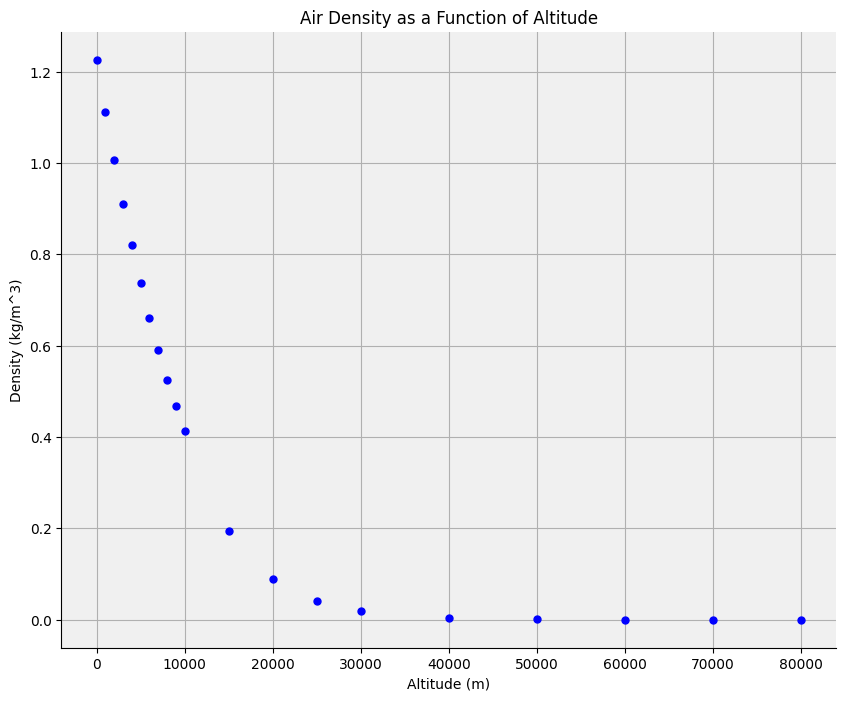

In [67]:
# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 8))

# Set the grid lines
ax.grid(True)

# Set the background color
ax.set_facecolor('#F0F0F0')

# Set the border properties
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set the line and marker properties
line_color = 'b'
line_width = 0
marker_color = 'b'
marker_style = 'o'
marker_size = 5

# Create the plot
if use_errors == True:
    plt.errorbar(altitude, density, yerr=density_uncertainty, color=line_color, linewidth=line_width,
         marker=marker_style, markersize=marker_size, markerfacecolor=marker_color)
else:
    plt.plot(altitude, density, color=line_color, linewidth=line_width,
         marker=marker_style, markersize=marker_size, markerfacecolor=marker_color)

# Set the plot title and axis labels
plt.title("Air Density as a Function of Altitude")
plt.xlabel("Altitude (m)")
plt.ylabel("Density (kg/m^3)")
#plt.yscale("log")

Fit the data with the pre-defined function

In [68]:
from scipy.optimize import curve_fit

if fit_type == 1:
    init_vals = [1.20,-0.0001]
else:
    init_vals = [1.20,-0.0001, -0.000001]

if use_errors == False:
    popt, pcov = curve_fit(fitfunction, altitude, density, p0=init_vals)
else:
    popt, pcov = curve_fit(fitfunction, altitude, density, sigma=density_uncertainty, absolute_sigma=True, p0=init_vals)

print (popt)
print (pcov)

[ 1.51524910e+00 -1.47493168e-04  2.53822505e-08]
[[ 1.75871452e-08 -1.53569264e-12  5.27798236e-15]
 [-1.53569264e-12  1.98691214e-16 -7.17906895e-19]
 [ 5.27798236e-15 -7.17906895e-19  2.64139031e-21]]


In [69]:
yfit = []
chi2=0
for i in range (0,npoints):
    yfit.append(fitfunction(altitude[i],*popt))
    chi2 += (density[i]-yfit[i])*(density[i]-yfit[i])

print ("Chi^2 / dof = %.3E / %d" % (chi2,npoints-len(init_vals)))

Chi^2 / dof = 1.557E-01 / 17


Draw the graph

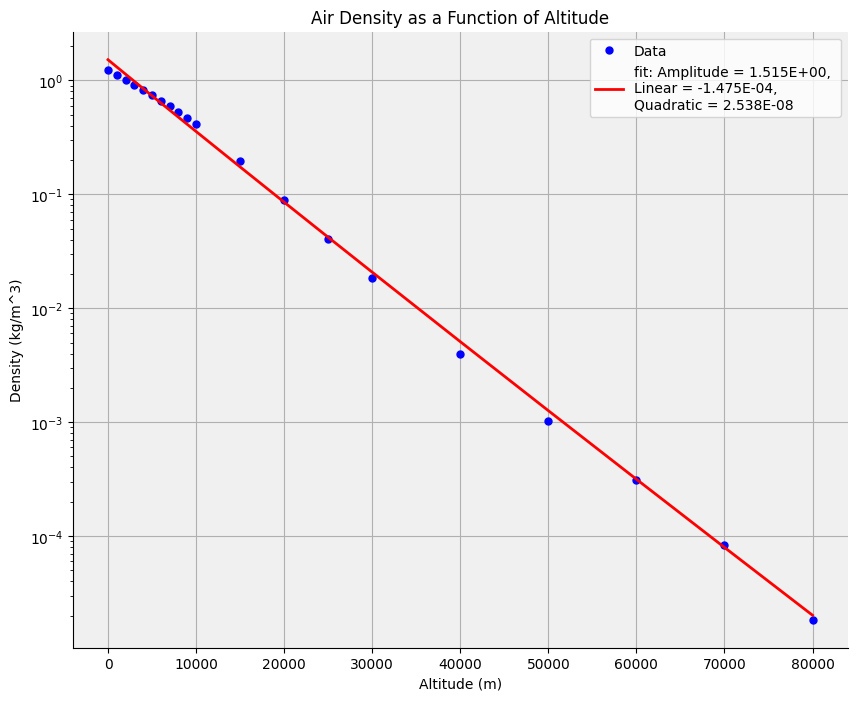

In [70]:
# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 8))

# Set the grid lines
ax.grid(True)

# Set the background color
ax.set_facecolor('#F0F0F0')

# Set the border properties
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set the line and marker properties
line_color = 'b'
line_width = 0
marker_color = 'b'
marker_style = 'o'
marker_size = 5

# Create the plot
plt.plot(altitude, density, color=line_color, linewidth=line_width,
         marker=marker_style, markersize=marker_size, markerfacecolor=marker_color, label='Data')
if fit_type == 1:
    plt.plot(altitude,yfit,color='r', linewidth=2, label = 'fit: Amplitude = %.3E, \nLinear = %.3E' % tuple(popt))
else:
    plt.plot(altitude,yfit,color='r', linewidth=2, label = 'fit: Amplitude = %.3E, \nLinear = %.3E, \nQuadratic = %.3E' % tuple(popt))

# Set the plot title and axis labels
plt.title("Air Density as a Function of Altitude")
plt.xlabel("Altitude (m)")
plt.ylabel("Density (kg/m^3)")
plt.yscale("log")
plt.legend()

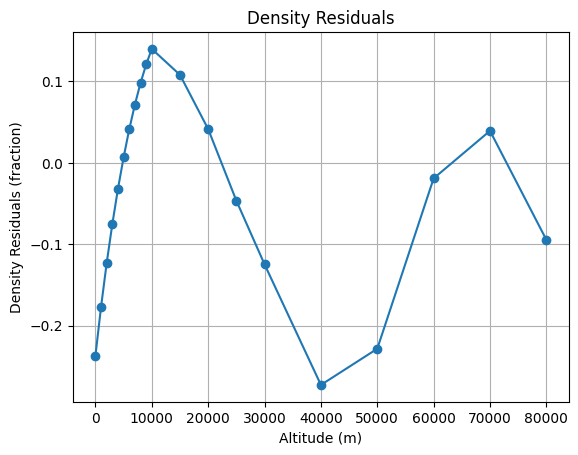

In [71]:
plt.title("Density Residuals")
plt.xlabel('Altitude (m)')
plt.ylabel('Density Residuals (fraction)')
plt.grid(True)

plt.plot(altitude, (density - fitfunction(altitude, *popt))/density, 'o-')

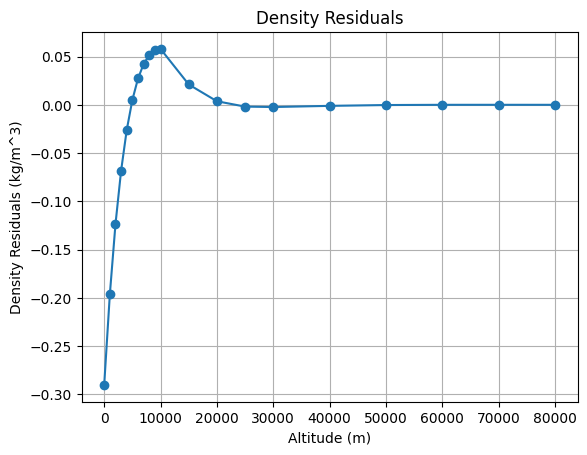

In [72]:
plt.title("Density Residuals")
plt.xlabel('Altitude (m)')
plt.ylabel('Density Residuals (kg/m^3)')
plt.grid(True)

plt.plot(altitude, (density - fitfunction(altitude, *popt)), 'o-')
residuals = (density - fitfunction(altitude, *popt))
popt_exponential = popt

In [73]:
init_vals = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

def residualfunction(x,a,b,c,d,e,f,g,h):
    return a+b*np.power(np.array(x),1)+c*np.power(np.array(x),2)+d*np.power(np.array(x),3)+e*np.power(np.array(x),4)+f*np.power(np.array(x),5)+g*np.power(np.array(x),6)+h*np.power(np.array(x),7)


In [74]:
if use_errors == False:
    popt, pcov = curve_fit(residualfunction, altitude, residuals, p0=init_vals)
else:
    popt, pcov = curve_fit(residualfunction, altitude, residuals, sigma=density_uncertainty, absolute_sigma=True, p0=init_vals)

In [75]:
print (popt, pcov)

[-1.66012928e-01  5.52505419e-05 -5.52550096e-09  2.59218834e-13
 -6.57151792e-18  9.28390314e-23 -6.88598830e-28  2.09119884e-33] [[ 2.75034769e-08 -7.75651977e-12  7.42039053e-16 -3.43751839e-20
   8.70014080e-25 -1.23208798e-29  9.17355883e-35 -2.79740802e-40]
 [-7.75651977e-12  2.38124595e-15 -2.35678407e-19  1.11147989e-23
  -2.84384795e-28  4.05663258e-33 -3.03587841e-38  9.29270923e-44]
 [ 7.42039053e-16 -2.35678407e-19  2.36607622e-23 -1.12485750e-27
   2.89312976e-32 -4.14216032e-37  3.10839585e-42 -9.53482584e-48]
 [-3.43751839e-20  1.11147989e-23 -1.12485750e-27  5.37354827e-32
  -1.38666671e-36  1.99020591e-41 -1.49635173e-46  4.59693756e-52]
 [ 8.70014080e-25 -2.84384795e-28  2.89312976e-32 -1.38666671e-36
   3.58691469e-41 -5.15757007e-46  3.88344826e-51 -1.19446063e-56]
 [-1.23208798e-29  4.05663258e-33 -4.14216032e-37  1.99020591e-41
  -5.15757007e-46  7.42678333e-51 -5.59870956e-56  1.72372979e-61]
 [ 9.17355883e-35 -3.03587841e-38  3.10839585e-42 -1.49635173e-46
   3.

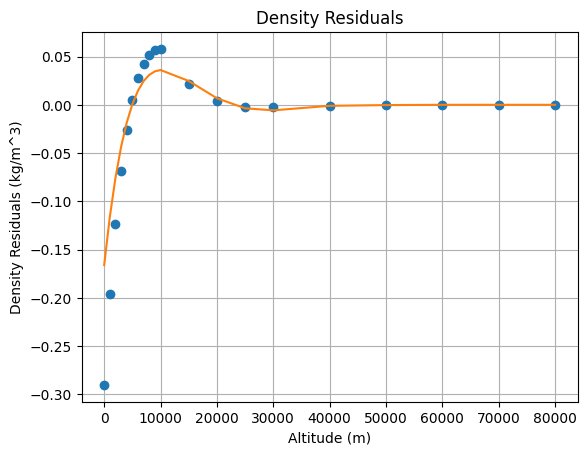

In [76]:
plt.title("Density Residuals")
plt.xlabel('Altitude (m)')
plt.ylabel('Density Residuals (kg/m^3)')
plt.grid(True)


plt.plot(altitude, residuals, 'o')
plt.plot(altitude, residualfunction(altitude, *popt), '-')

In [77]:
popt_combined = [popt_exponential[0], popt_exponential[1], popt[0], popt[1], popt[2], popt[3], popt[4], popt[5], popt[6], popt[7]]

In [78]:
def fitfunction_combined(x,a0,a1,a,b,c,d,e,f,g,h):
    return a0*np.exp(a1*np.array(x))+a+b*np.power(np.array(x),1)+c*np.power(np.array(x),2)+d*np.power(np.array(x),3)+e*np.power(np.array(x),4)+f*np.power(np.array(x),5)+g*np.power(np.array(x),6)+h*np.power(np.array(x),7)

In [79]:
init_vals = popt_combined
if use_errors == False:
    popt, pcov = curve_fit(fitfunction_combined, altitude, density, p0=init_vals)
else:
    popt, pcov = curve_fit(fitfunction_combined, altitude, density, sigma=density_uncertainty, absolute_sigma=True, p0=init_vals)

RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 2200.

In [80]:
print (popt, pcov)

[-1.66012928e-01  5.52505419e-05 -5.52550096e-09  2.59218834e-13
 -6.57151792e-18  9.28390314e-23 -6.88598830e-28  2.09119884e-33] [[ 2.75034769e-08 -7.75651977e-12  7.42039053e-16 -3.43751839e-20
   8.70014080e-25 -1.23208798e-29  9.17355883e-35 -2.79740802e-40]
 [-7.75651977e-12  2.38124595e-15 -2.35678407e-19  1.11147989e-23
  -2.84384795e-28  4.05663258e-33 -3.03587841e-38  9.29270923e-44]
 [ 7.42039053e-16 -2.35678407e-19  2.36607622e-23 -1.12485750e-27
   2.89312976e-32 -4.14216032e-37  3.10839585e-42 -9.53482584e-48]
 [-3.43751839e-20  1.11147989e-23 -1.12485750e-27  5.37354827e-32
  -1.38666671e-36  1.99020591e-41 -1.49635173e-46  4.59693756e-52]
 [ 8.70014080e-25 -2.84384795e-28  2.89312976e-32 -1.38666671e-36
   3.58691469e-41 -5.15757007e-46  3.88344826e-51 -1.19446063e-56]
 [-1.23208798e-29  4.05663258e-33 -4.14216032e-37  1.99020591e-41
  -5.15757007e-46  7.42678333e-51 -5.59870956e-56  1.72372979e-61]
 [ 9.17355883e-35 -3.03587841e-38  3.10839585e-42 -1.49635173e-46
   3.

In [81]:
yfit = []
chi2=0
for i in range (0,npoints):
    yfit.append(fitfunction_combined(altitude[i],*popt))
    chi2 += (density[i]-yfit[i])*(density[i]-yfit[i])
    
print ("Chi^2 / dof = %.3E / %d" % (chi2,npoints-len(init_vals)))

# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 8))

# Set the grid lines
ax.grid(True)

# Set the background color
ax.set_facecolor('#F0F0F0')

# Set the border properties
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set the line and marker properties
line_color = 'b'
line_width = 0
marker_color = 'b'
marker_style = 'o'
marker_size = 5

# Create the plot
plt.plot(altitude, density, color=line_color, linewidth=line_width,
         marker=marker_style, markersize=marker_size, markerfacecolor=marker_color, label='Data')

plt.plot(altitude,np.abs(yfit),color='r', linewidth=2, label = "Fit")

# Set the plot title and axis labels
plt.title("Air Density as a Function of Altitude")
plt.xlabel("Altitude (m)")
plt.ylabel("Density (kg/m^3)")
#plt.yscale("log")
plt.legend()

TypeError: fitfunction_combined() missing 2 required positional arguments: 'g' and 'h'